## HW 4

### Nafis Fuad

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import csv
import random
import math
from pandas import read_csv
from sklearn.model_selection import train_test_split

In [3]:
main_data = read_csv('/content/drive/MyDrive/Civil-7630/ML_HomeWork/adult.csv')
main_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

In [4]:
main_data.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
#Replacing question marks in dataset with null values

main_data.replace('?',np.nan )

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


### Data split

In [6]:
train, test = train_test_split(main_data, test_size=0.2)
train, val = train_test_split(train, test_size=0.125)

In [7]:
print(main_data.shape[0])
print(train.shape[0])
print(val.shape[0])
print(test.shape[0])

32561
22792
3256
6513


In [8]:
main_data = np.array(main_data)
train = np.array(train)
val = np.array(val)
test = np.array(test)


## Necesarry class and functions

In [9]:
class Node(object):
    def __init__(self):
        self.leafNode = None
        self.classLabel = None
        self.splitFeatureName = None
        self.splitFeatureIdx = None
        self.splitFeatureAttributeType = None
        self.nodeName = None
        self.cutOffThreshold = None
        self.children = []

    def add_child(self, obj):
        self.children.append(obj)


attributes_types = {
    0: 'Continuous',
    1: 'Discrete',
    2: 'Continuous',
    3: 'Discrete',
    4: 'Continuous',
    5: 'Discrete',
    6: 'Discrete',
    7: 'Discrete',
    8: 'Discrete',
    9: 'Discrete',
    10: 'Continuous',
    11: 'Continuous',
    12: 'Continuous',
    13: 'Discrete'
}

attributes_names = {
    0: 'age',
    1: 'workclass',
    2: 'fnlwgt',
    3: 'education',
    4: 'education.num',
    5: 'marital.status',
    6: 'occupation',
    7: 'relationship',
    8: 'race',
    9: 'sex',
    10: 'capital.gain',
    11: 'capital.loss',
    12: 'hours.per.week',
    13: 'native.country'
}

In [10]:
def NodeEntropy(data):
    #implementation of eq. 9.3 to calculate NodeEntropy

    y = np.array(data[:,-1])
    classes = np.unique(y)

    class_occurence = []

    value = 0

    #check for both classes <=50K and >50K
    for c in classes:
        class_occurence.append([c,np.count_nonzero(y == c)])
        prob = np.count_nonzero(y == c)/y.shape[0]
        value = value + (prob * math.log2(prob))


    value = value * -1

    return value

In [11]:
def split_Entropy_discrete(data, indx):
    #implementation of eq. 9.8 for discrete splitEntropy

    attributes_col = np.array(data[:,indx])

    #get the unique values in the column
    discrete_values = np.unique(attributes_col)

    outer_val = 0

    #for each unique value, do following
    for disc_value in discrete_values:
        #get the index values in the data where the column values are equal to the unique discrete value
        inds = np.where(data[:, indx] == disc_value)

        #fetch the data based on the above indices
        specific_rows = data[inds]

        #calculate the outer probability
        outer_prob = specific_rows.shape[0]/data.shape[0]

        y = np.array(specific_rows[:, -1])
        classes = np.unique(y)
        inner_val = 0

        #check which rows have <=50K and >50K
        for c in classes:
            prob = np.count_nonzero(y == c) / y.shape[0]
            inner_val = inner_val + (prob * math.log2(prob))

        inner_val = inner_val * outer_prob

        outer_val = outer_val + inner_val

    outer_val = outer_val * -1

    return [discrete_values, discrete_values.shape[0], outer_val]

def split_Entropy_continuous(data, indx):
    #implementation of eq. 9.8 for continuous splitEntropy

    attributes_col = np.array(data[:,indx])
    continuous_values = np.array(attributes_col, dtype=float)

    #get the distinct continuous values of the column
    distinct_cont_values = np.unique(continuous_values)
    distinct_cont_values = np.sort(distinct_cont_values)


    splits = [data, data]
    possible_cuts = []

    #check for all the possible splits
    for value in distinct_cont_values:

        outer_val = 0
        left_split_id = np.where(continuous_values<=value)
        splits[0] = data[left_split_id]

        right_split_id = np.where(continuous_values>value)
        splits[1] = data[right_split_id]

        for i in range(2):
            outer_prob = splits[i].shape[0]/data.shape[0]

            y = np.array(splits[i][:,-1])
            classes = np.unique(y)
            inner_val = 0

            #check for both classes <=50K and >50K
            for c in classes:
                prob = np.count_nonzero(y == c) / y.shape[0]
                inner_val = inner_val + (prob * math.log2(prob))

            inner_val = inner_val * outer_prob

            outer_val = outer_val + inner_val

        outer_val = outer_val * -1
        possible_cuts.append([value, outer_val])

    possible_cuts = np.array(possible_cuts)

    #out of all the split, get the cutOff value which has the minimum value
    min_ind = np.argmin(possible_cuts[:,1])

    return possible_cuts[min_ind]



def split_attribute(data):
    min_ENT = 1000000


    bestcutOff = -1
    bestClasses = 0
    best_classes_names = []
    bestF = 0

    #check the all the attributes one by one
    for i in range(data.shape[1]-1):

        #if attribute is Discrete do following
        if(attributes_types[i] == 'Discrete'):

            #calculate the split Entropy of discrete attribute
            classes_names, classes, e = split_Entropy_discrete(data, i)

            #if entropy is less than the MIN_Entropy defined as Max in start, do following
            if(e<min_ENT):
                bestF = i
                min_ENT = e
                bestClasses = classes
                bestcutOff = -1
                best_classes_names = classes_names

        # if attribute is Continuous do following
        if(attributes_types[i] == 'Continuous'):

            # calculate the split Entropy of Continuous attribute
            cutOFf, e = split_Entropy_continuous(data, i)

            # if entropy is less than the MIN_Entropy defined as Max in start, do following
            if(e<min_ENT):
                bestF = i
                min_ENT = e
                bestcutOff = cutOFf
                bestClasses = 2
                best_classes_names = []

    print(attributes_types[bestF])
    print(attributes_names[bestF])
    print(min_ENT)


    return [attributes_names[bestF], bestF, attributes_types[bestF], bestClasses, bestcutOff, best_classes_names]

In [12]:
def Generate_tree(node, THETA, data):
    #get the NodeEntropy of the data
    node_entropy = NodeEntropy(data)
    print(data.shape)
    print("node entropy: ", node_entropy)

    #If node_entropy is less than Theta, create a leaf
    if(node_entropy < THETA):
        node.leafNode = True

        y = data[:,-1]

        class_0 = np.count_nonzero(y == "<=50K")
        class_1 = np.count_nonzero(y == ">50K")

        if(class_0 >= class_1):
            node.classLabel = "<=50K"
        else:
            node.classLabel = ">50K"

        return
    else:
        #If node_entropy is greater than theta, get the best attribute to split
        split = split_attribute(data)
        print(split)

        if(split[2] == 'Discrete'):
            node.splitFeatureAttributeType = split[2]
            node.splitFeatureName = split[0]
            node.splitFeatureIdx = split[1]


            for name in split[5]:
                new_branch = Node()
                new_branch.nodeName = name
                node.add_child(new_branch)

                inds = np.where(data[:, split[1]] == name)

                specific_rows = data[inds]
                Generate_tree(new_branch, THETA, specific_rows.copy())

        if(split[2] == 'Continuous'):
            node.leafNode = False
            node.splitFeatureAttributeType = split[2]
            node.splitFeatureName = split[0]
            node.splitFeatureIdx = split[1]
            node.cutOffThreshold = split[4]

            less_than_cutOff = Node()
            less_than_cutOff.nodeName = ('<='+str(split[4])+'_', split[0])
            less_than_cutOff.leafNode = False;
            node.add_child(less_than_cutOff)


            attributes_col = np.array(data[:, split[1]])
            continuous_values = np.array(attributes_col, dtype=float)
            inds = np.where(continuous_values < split[4])
            specific_rows = data[inds]
            Generate_tree(less_than_cutOff, THETA, specific_rows.copy())

            greater_than_cutOff = Node()
            greater_than_cutOff.nodeName = ('>'+str(split[4])+'_', split[0])
            node.add_child(greater_than_cutOff)

            attributes_col = np.array(data[:, split[1]])
            continuous_values = np.array(attributes_col, dtype=float)
            inds = np.where(continuous_values < split[4])
            specific_rows = data[inds]
            Generate_tree(greater_than_cutOff, THETA, specific_rows.copy())

In [13]:
def check_tree(node, test_row):
    if(node.leafNode == True):
        # print('Class Label = ', node.classLabel)
        return node.classLabel


    if(node.splitFeatureAttributeType == "Discrete"):
        for c in node.children:
            if(c.nodeName == test_row[node.splitFeatureIdx]):
                return check_tree(c, test_row)

    if(node.splitFeatureAttributeType == "Continuous"):
        if(int(test_row[node.splitFeatureIdx]) <= int(node.cutOffThreshold)):
            return check_tree(node.children[0], test_row)
        else:
            return check_tree(node.children[1], test_row)

In [14]:
#for different theta values
theta = np.array([0.2,0.4,0.6,0.8])

## Training

In [15]:
train_accuracy =[]
train_loss = []
val_accuracy = []
val_loss = []
test_accuracy =[]
test_loss = []

#Generating the tree using C4.5 algorithm
for t in theta:
    root = Node()
    root.nodeName = "Root"
    Generate_tree(root,t,train.copy())
    total = 0
    right = 0
    wrong = 0

    for i in range(train.shape[0]):
        total+=1
        get_prediction = check_tree(root, train[i,:])
        if(get_prediction == train[i,-1]):
            right+=1
        else:
            wrong+=1

    train_accuracy.append((right/total)*100)
    train_loss.append((100 - (right / total) * 100))


    count = 0
    total = 0
    right = 0
    wrong = 0

    for i in range(val.shape[0]):
        total+=1
        get_prediction = check_tree(root, val[i,:])
        if(get_prediction == val[i,-1]):
            right+=1
        else:
            wrong+=1

    val_accuracy.append((right/total)*100)
    val_loss.append((100 - (right / total) * 100))


    count = 0
    total = 0
    right = 0
    wrong = 0

    for i in range(test.shape[0]):
        total+=1
        get_prediction = check_tree(root, test[i,:])
        if(get_prediction == None):
            count+=1
        if(get_prediction == test[i,-1]):
            right+=1
        else:
            wrong+=1
    test_accuracy.append((right/total)*100)
    test_loss.append((100 - (right / total) * 100))

Streaming output truncated to the last 5000 lines.
node entropy:  -0.0
(53, 15)
node entropy:  0.6572729784684465
Continuous
age
0.5847400110481267
['age', 0, 'Continuous', 2, 46.0, []]
(29, 15)
node entropy:  0.362051251733998
(29, 15)
node entropy:  0.362051251733998
(5, 15)
node entropy:  0.9709505944546686
Continuous
age
0.5509775004326937
['age', 0, 'Continuous', 2, 36.0, []]
(1, 15)
node entropy:  -0.0
(1, 15)
node entropy:  -0.0
(160, 15)
node entropy:  0.6098403047164004
Continuous
hours.per.week
0.5651022721043581
['hours.per.week', 12, 'Continuous', 2, 50.0, []]
(78, 15)
node entropy:  0.39124356362925566
(78, 15)
node entropy:  0.39124356362925566
(134, 15)
node entropy:  0.6942347416140927
Continuous
age
0.6526339418186813
['age', 0, 'Continuous', 2, 36.0, []]
(60, 15)
node entropy:  0.4689955935892812
(60, 15)
node entropy:  0.4689955935892812
(324, 15)
node entropy:  0.7858895831387682
Continuous
age
0.7413686359031668
['age', 0, 'Continuous', 2, 36.0, []]
(119, 15)
node 

## Calculating values

In [16]:
for i in range(len(theta)):
    print(f"For theta = {theta[i]}")
    print(f"Training accuracy: ", train_accuracy[i])
    print(f"Training loss: ", train_loss[i])
    print("----------------------------------")

    print(f"Validation accuracy: ", val_accuracy[i])
    print(f"Validation loss: ", val_loss[i])
    print("----------------------------------")

    print(f"Test accuracy: ", test_accuracy[i])
    print(f"Test loss: ", test_loss[i])
    print("----------------------------------")


For theta = 0.2
Training accuracy:  77.7992277992278
Training loss:  22.200772200772207
----------------------------------
Validation accuracy:  76.53562653562653
Validation loss:  23.464373464373466
----------------------------------
Test accuracy:  75.894365115922
Test loss:  24.105634884078
----------------------------------
For theta = 0.4
Training accuracy:  77.51404001404
Training loss:  22.485959985959994
----------------------------------
Validation accuracy:  76.84275184275184
Validation loss:  23.157248157248162
----------------------------------
Test accuracy:  76.3549823430063
Test loss:  23.6450176569937
----------------------------------
For theta = 0.6
Training accuracy:  78.82151632151631
Training loss:  21.178483678483687
----------------------------------
Validation accuracy:  78.1019656019656
Validation loss:  21.898034398034397
----------------------------------
Test accuracy:  77.81360356210656
Test loss:  22.186396437893436
----------------------------------
For t

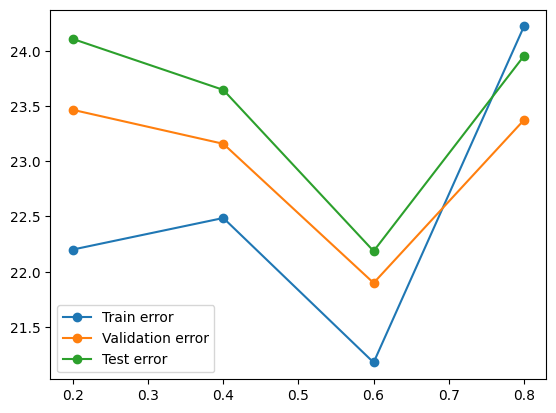

In [17]:
import matplotlib.pyplot as plt

plt.plot(theta, train_loss, marker='o', label = "Train error")
plt.plot(theta, val_loss, marker='o', label = "Validation error")
plt.plot(theta, test_loss, marker='o', label = "Test error")

plt.legend()
plt.show()

## Conclusion

We can see from the accuracy values and the plot values that for theta = 0.2 gives us the best evaluation metric and for theta = 0.8 it gives the worst value. Becayse for the greater the theta value the shallower the tree is. As a result, shallow tree gives bad results and deep trees give good results.